## Collatz beta notebook

In [42]:
"""
This notebook analyses the betas of collatz sequences and their relationship
to other components.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from fractions import Fraction
import random as rnd
import matplotlib.pyplot as plt
from math import log2
import pandas as pd
from collatz import commons as com
from collatz import generator as gen


# Configuration
k = 3
max_value = 101
max_iterations = 30
start_value = rnd.randint(1, max_value)

if start_value % 2 == 0:
    start_value = start_value + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=start_value, k=k, max_iterations=max_iterations)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive additional fields
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame.insert(1, "v_1", [start_value] * len(analysis_frame))

# Calculate alpha
analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_max"] = analysis_frame["n"] * log2(k) + log2(start_value)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

# Calculate beta
analysis_frame["beta_i"] = 1 + 1/(k*analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()
analysis_frame["beta_log"] = analysis_frame["beta"].apply(log2)
analysis_frame["beta_log_max"] = analysis_frame["alpha_max"] - \
                             analysis_frame["n"] * log2(k) - log2(start_value)

analysis_frame["beta_log_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1 - \
                                   analysis_frame["n"] * log2(k)

analysis_frame["beta_max"] = 2**analysis_frame["beta_log_max"]
analysis_frame["beta_cycle"] = 2**analysis_frame["beta_log_cycle"]

analysis_frame["beta_frac"] = analysis_frame["beta"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_max_frac"] = analysis_frame["beta_max"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_cycle_frac"] = analysis_frame["beta_cycle"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

# Print results
print_frame = analysis_frame[[
    "n", "collatz","next_odd",
    "beta", "beta_max", "beta_cycle", 
    "beta_frac", "beta_max_frac", "beta_cycle_frac"
]]

print_frame.columns = ["n","v_i", "v_i+1",
                       "b", "b_max", "b_cycle", 
                       "b_frac", "b_max_frac", "b_cycle_frac"]

final_beta = analysis_frame["beta"][len(analysis_frame)-1]

print("v1:", start_value, " K:", k, 
      " final beta:", final_beta, 
      "\n")

print(print_frame.to_string(index=False), "\n")

v1: 89  K: 3  final beta: 1.1971501101446689 

 n  v_i  v_i+1         b     b_max   b_cycle          b_frac      b_max_frac b_cycle_frac
 1   89     67  1.003745  1.917603  1.333333         268/267         512/267          4/3
 2   67    101  1.008739  1.278402  1.777778         808/801        1024/801         16/9
 3  101     19  1.012068  1.704536  1.185185       2432/2403       4096/2403        32/27
 4   19     29  1.029824  1.136357  1.580247       7424/7209       8192/7209       128/81
 5   29     11  1.041661  1.515143  1.053498     22528/21627     32768/21627      256/243
 6   11     17  1.073226  1.010095  1.404664     69632/64881     65536/64881     1024/729
 7   17     13  1.094270  1.346794  1.872885   212992/194643   262144/194643    4096/2187
 8   13      5  1.122328  1.795725  1.248590   655360/583929  1048576/583929    8192/6561
 9    5      1  1.197150  1.197150  1.664787  1091255/911544  1091255/911544  32768/19683 



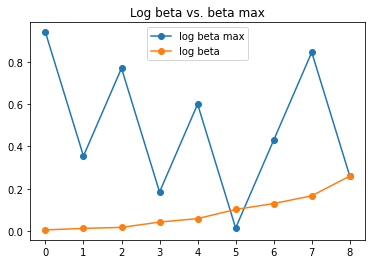

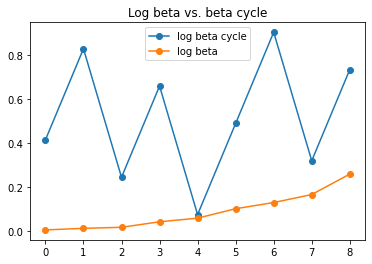

In [43]:
# Plot results
plt.figure()
plt.title("Log beta vs. beta max")
plt.plot(analysis_frame["beta_log_max"], "-o", label="log beta max")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()

plt.figure()
plt.title("Log beta vs. beta cycle")
plt.plot(analysis_frame["beta_log_cycle"], "-o", label="log beta cycle")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()
plt.show()
